# Decision Tree Classifier

In [ ]:
# Core
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Evitamos la notación científica y rendondeamos los valores a 2 dígitos después de la coma
pd.options.display.float_format = '{:,.2f}'.format

# Ignore Warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cargamos nuestro dataset
data = pd.read_csv('https://raw.githubusercontent.com/jorge-robledo11/Datasets/main/Datasets/iris/iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


In [ ]:
# Dimensiones
display(data.shape)

(150, 5)

In [ ]:
# Datos faltantes
display(data.isnull().sum())

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [ ]:
# Tipos de variables del dataset
display(data.dtypes)

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [ ]:
# Resumen de nuestro dataset
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


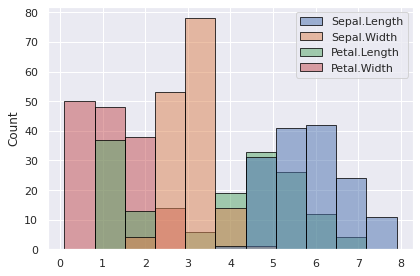

In [ ]:
# Distribución de las especies
sns.set_theme(style='darkgrid')
sns.histplot(data=data, edgecolor='black', linewidth=0.75)
plt.tight_layout();

In [ ]:
# Cantidades por especies
data['Species'].value_counts().sort_values()

versicolor    50
setosa        50
virginica     50
Name: Species, dtype: int64

In [ ]:
# Definimos nuestros features y target
X = data.drop(['Species'], axis=1)
y = data['Species']

In [ ]:
# Importamos nuestro método para separar los datos de entrenamiento y test
from sklearn.model_selection import train_test_split

# Separando y entrenado los subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [ ]:
# Importamos nuestro clasificador
from sklearn.tree import DecisionTreeClassifier

# Definimos y entrenamos nuestro clasificador
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=0)

## Predicción

In [ ]:
# Predicción
y_pred = clf.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor'], dtype=object)

In [ ]:
# Métricas
from sklearn.metrics import classification_report

# Reporte de Clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [ ]:
# Score
display(clf.score(X_train, y_train))
display(clf.score(X_test, y_test))

0.9777777777777777

1.0

In [ ]:
# Cruzamos las predicciones
pd.crosstab(y_test, y_pred, rownames=['Especie'], colnames=['Predicciones'])

Predicciones,setosa,versicolor,virginica
Especie,,,
setosa,3,0,0
versicolor,0,8,0
virginica,0,0,4


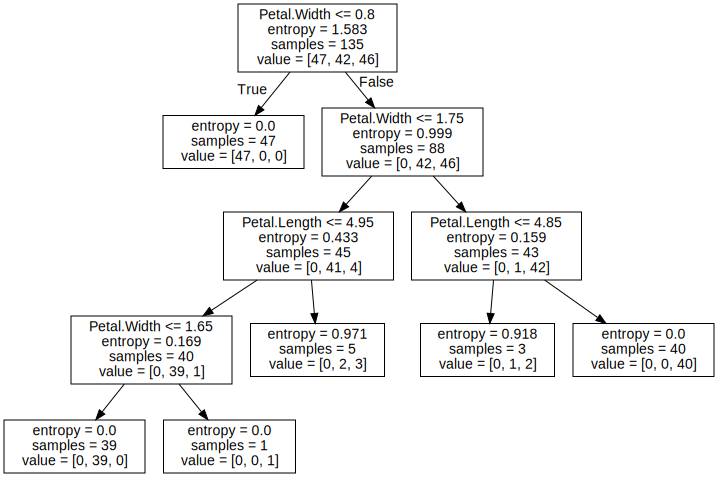

In [ ]:
"""
1. Importamos las dependencias
2. Creamos nuestro fichero
3. Graficamos nuestro árbol
"""

from sklearn.tree import export_graphviz
import os
from graphviz import Source

with open("/work/Machine Learning Data Science en Python/Algoritmos de Machine Learning/Decision Tree & Random Forest/iris_dtree.dot", "w") as dotfile:
    export_graphviz(clf, out_file=dotfile, feature_names=list(X))
    dotfile.close()

file = open("/work/Machine Learning Data Science en Python/Algoritmos de Machine Learning/Decision Tree & Random Forest/iris_dtree.dot", "r")
text = file.read()
Source(text)

## Cross Validation

In [ ]:
# Instanciamos nuestro modelo con otros parámetros
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=20, random_state=0)
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=20,
                       random_state=0)

In [ ]:
# Importamos K-Fold Estraficado y el Score de Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Instanciamos y dividimos los datos de entrenamiento y test
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

for train, test in skf.split(X,y):

    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]

In [ ]:
# Score Cross Validation
score = cross_val_score(clf, X, y, scoring='accuracy', cv=skf, n_jobs=-1).mean()
display(f'Score Cross Validation: {round(score,2)}')

'Score Cross Validation: 0.93'

In [ ]:
# Predicción
y_pred = clf.predict(X_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica'], dtype=object)

In [ ]:
# Métricas
from sklearn.metrics import classification_report, cluster

# Reporte de Clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      0.80      0.89         5
   virginica       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



In [ ]:
# Cruzamos las predicciones
pd.crosstab(y_test, y_pred, rownames=['Especie'], colnames=['Predicciones'])

Predicciones,setosa,versicolor,virginica
Especie,,,
setosa,5,0,0
versicolor,0,4,1
virginica,0,0,5


In [ ]:
# Mejores features
for i in range(1,11):

    clf = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=0)
    clf.fit(X,y)

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    resultados = cross_val_score(clf, X, y, scoring="accuracy", cv = skf, n_jobs=1).mean()
    
    print("Score para i = ",i," es de ", score)
    print("   ",clf.feature_importances_)

Score para i =  1  es de  0.9266666666666667
    [0. 0. 0. 1.]
Score para i =  2  es de  0.9266666666666667
    [0. 0. 0. 1.]
Score para i =  3  es de  0.9266666666666667
    [0.         0.         0.07060267 0.92939733]
Score para i =  4  es de  0.9266666666666667
    [0.         0.         0.06844516 0.93155484]
Score para i =  5  es de  0.9266666666666667
    [0.         0.         0.06844516 0.93155484]
Score para i =  6  es de  0.9266666666666667
    [0.         0.         0.06844516 0.93155484]
Score para i =  7  es de  0.9266666666666667
    [0.         0.         0.06844516 0.93155484]
Score para i =  8  es de  0.9266666666666667
    [0.         0.         0.06844516 0.93155484]
Score para i =  9  es de  0.9266666666666667
    [0.         0.         0.06844516 0.93155484]
Score para i =  10  es de  0.9266666666666667
    [0.         0.         0.06844516 0.93155484]


# Random Forest Classifier

In [ ]:
# Importamos nuestro clasificador
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Instanciamos y entrenamos
forest = RandomForestClassifier(n_jobs=-1, oob_score=True, n_estimators=1000, max_depth=50)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=1000, n_jobs=-1,
                       oob_score=True)

In [ ]:
# Predicción
y_pred2 = forest.predict(X_test)
y_pred2

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica'], dtype=object)

In [ ]:
# Reporte de Clasificación
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      0.80      0.89         5
   virginica       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



In [ ]:
# Score
display(f'Score: {round(forest.oob_score_,2)}')

'Score: 0.96'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ec84517-f553-446b-9032-1da3132bd62a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>